### exploratory data analysis

#### Load data and look into the attributes

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

In [2]:
df = pd.read_csv('fixed2-data.csv', delimiter=',', encoding= 'unicode_escape')

In [3]:
df.head(10)

,Id,Age,Race,Sex,Diagnosed,Site,Stage,Surgery,Extend,Months,COD,COD2,Sequence number,Malignat number,Report,Property,Tumor size,Chemotherapy,Radiotherapy
0,22929427,15-19,White,Male,1975,Bones and Joints,Regional,No,NaN,31.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,94.0,Yes,No
1,10123011,05-09,White,Male,1975,Bones and Joints,Regional,No,NaN,23.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,94.0,Yes,No
2,28016877,15-19,White,Male,1975,Bones and Joints,Distant,No,NaN,28.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,104.0,Yes,No
3,10055225,15-19,White,Male,1975,Bones and Joints,Regional,No,NaN,11.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,94.0,Yes,No
4,5166438,15-19,White,Male,1975,Bones and Joints,Localized,Yes,NaN,31.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,142.0,No,No
5,5168243,10-14,White,Male,1975,Bones and Joints,Regional,Yes,NaN,13.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,94.0,Yes,No
6,5172090,10-14,White,Male,1975,Bones and Joints,Distant,Unknown,NaN,522.0,Alive,Alive or dead of other cause,One primary only,1,Hospital inpatient/outpatient or clinic,NaN,110.0,Yes,No
7,28017923,15-19,White,Female,1975,Bones and Joints,Localized,No,NaN,20.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,142.0,No,No
8,10069944,15-19,White,Male,1975,Bones and Joints,Distant,No,NaN,14.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,104.0,Yes,No
9,147814,10-14,White,Male,1975,Bones and Joints,Localized,No,NaN,24.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,142.0,No,No


In [121]:
df.isna().sum()

Id                    0
Age                   0
Race                  0
Sex                   0
Diagnosed             0
Site                  0
Stage                 0
Surgery               0
Extend              307
Months                4
COD                   0
COD2                  0
Sequence number       0
Malignat number       0
Report                0
Property            338
Tumor size            0
Chemotherapy          0
Radiotherapy          0
Diagnosed group       0
Survive               4
Tumor size group      0
dtype: int64

In [25]:
df.loc[(df['Tumor size'] >= 0) & (df['Tumor size'] < 50)]

,Id,Age,Race,Sex,Diagnosed,Site,Stage,Surgery,Extend,Months,COD,COD2,Sequence number,Malignat number,Report,Property,Tumor size,Chemotherapy,Radiotherapy
186,17123265,05-09,White,Male,1983,Bones and Joints,Regional,Yes,4.0,425.0,Alive,Alive or dead of other cause,One primary only,1,Hospital inpatient/outpatient or clinic,NaN,35.0,Yes,No
192,10304177,05-09,White,Male,1983,Bones and Joints,Distant,Yes,8.0,14.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,35.0,Yes,No
195,28066035,10-14,White,Female,1983,Bones and Joints,Localized,No,9.0,423.0,Alive,Alive or dead of other cause,One primary only,1,Hospital inpatient/outpatient or clinic,NaN,20.0,No,No
210,23105548,10-14,White,Male,1984,Bones and Joints,Regional,No,4.0,145.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,40.0,Yes,No
226,17138544,05-09,White,Female,1984,Bones and Joints,Regional,Yes,7.0,21.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,30.0,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2550,21640551,15-19,White,Male,2018,Bones and Joints,Localized,Yes,0.0,7.0,Alive,Alive or dead of other cause,One primary only,1,Hospital inpatient/outpatient or clinic,"$35,000 - $39,999",45.0,Yes,Yes
2554,24364333,10-14,Other,Female,2018,Bones and Joints,Localized,No,99.0,6.0,Alive,Alive or dead of other cause,One primary only,1,Hospital inpatient/outpatient or clinic,"$75,000+",45.0,Yes,No
2569,58085033,05-09,White,Male,2018,Soft Tissue including Heart,Localized,Yes,0.0,1.0,Alive,Alive or dead of other cause,One primary only,1,Hospital inpatient/outpatient or clinic,"$55,000 - $59,999",20.0,Yes,Yes
2574,46136540,15-19,White,Female,2018,Soft Tissue including Heart,Localized,Yes,1.0,10.0,Alive,Alive or dead of other cause,One primary only,1,Hospital inpatient/outpatient or clinic,"$60,000 - $64,999",30.0,Yes,No


In [26]:
df['Stage'].value_counts()

Localized    1097
Regional      834
Distant       650
Name: Stage, dtype: int64

In [28]:
df['Age'].value_counts()

15-19    982
10-14    883
05-09    455
01-04    215
00        46
Name: Age, dtype: int64

In [29]:
df['Race'].value_counts()

White    2275
Other     204
Black     102
Name: Race, dtype: int64

In [30]:
df['Sex'].value_counts()

Male      1519
Female    1062
Name: Sex, dtype: int64

## Fix property values

In [229]:
df['Property'].value_counts()

$75,000+             728
$60,000 - $64,999    415
$65,000 - $69,999    292
$70,000 - $74,999    237
$55,000 - $59,999    192
$50,000 - $54,999    161
$45,000 - $49,999    117
$40,000 - $44,999     62
$35,000 - $39,999     26
< $35,000             13
Name: Property, dtype: int64

In [247]:
df.loc[ (df['Property'] == '< $59,999')
            | (df['Property'] == '$35,000 - $39,999')
               | (df['Property'] == '$40,000 - $44,999')
               | (df['Property'] == '$45,000 - $49,999')
               | (df['Property'] == '$50,000 - $54,999') 
               | (df['Property'] == '$55,000 - $59,999'), 
           'Property'] = '< $60,999'


In [248]:
df['Property'].value_counts()

$60,000 - $74,999    944
$75,000+             728
< $60,999            571
Name: Property, dtype: int64

## Make diagnosed group

In [44]:
df['Diagnosed group'].value_counts()

2000-2009    992
2010-2018    862
1975-1999    727
Name: Diagnosed group, dtype: int64

In [41]:
df['Diagnosed group'] = df['Diagnosed']

In [43]:
df.loc[(df['Diagnosed'] >= 1975) & (df['Diagnosed'] < 2000), 'Diagnosed group'] = '1975-1999'
df.loc[(df['Diagnosed'] >= 2000) & (df['Diagnosed'] < 2010), 'Diagnosed group'] = '2000-2009'
df.loc[(df['Diagnosed'] >= 2010) & (df['Diagnosed'] < 2019), 'Diagnosed group'] = '2010-2018'

In [39]:
df.loc[(df['Diagnosed'] >= 1975) & (df['Diagnosed'] < 2000) ]

,Id,Age,Race,Sex,Diagnosed,Site,Stage,Surgery,Extend,Months,COD,COD2,Sequence number,Malignat number,Report,Property,Tumor size,Chemotherapy,Radiotherapy
0,22929427,15-19,White,Male,1975,Bones and Joints,Regional,No,NaN,31.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,94.0,Yes,No
1,10123011,05-09,White,Male,1975,Bones and Joints,Regional,No,NaN,23.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,94.0,Yes,No
2,28016877,15-19,White,Male,1975,Bones and Joints,Distant,No,NaN,28.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,104.0,Yes,No
3,10055225,15-19,White,Male,1975,Bones and Joints,Regional,No,NaN,11.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,94.0,Yes,No
4,5166438,15-19,White,Male,1975,Bones and Joints,Localized,Yes,NaN,31.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,NaN,142.0,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
722,32628916,15-19,White,Male,1999,Bones and Joints,Distant,No,0.0,8.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,"$75,000+",80.0,Yes,No
723,21334362,10-14,White,Male,1999,Soft Tissue including Heart,Regional,No,0.0,229.0,Alive,Alive or dead of other cause,One primary only,1,Hospital inpatient/outpatient or clinic,"$40,000 - $44,999",60.0,Yes,No
724,34546707,15-19,Other,Female,1999,Bones and Joints,Distant,No,0.0,228.0,Alive,Alive or dead of other cause,One primary only,1,Hospital inpatient/outpatient or clinic,"$60,000 - $64,999",100.0,Yes,No
725,32686435,05-09,White,Female,1999,Bones and Joints,Distant,No,0.0,115.0,Bones and Joints,Dead (attributable to this cancer dx),One primary only,1,Hospital inpatient/outpatient or clinic,"$75,000+",100.0,Yes,No


In [60]:
df['COD'].value_counts()

Alive                             1595
Bones and Joints                   716
Dead Other Site                    196
Soft Tissue including Heart         37
Brain and Other Nervous System      22
Other Cause of Death                15
Name: COD, dtype: int64

In [59]:
df['Survive'] = 'Alive'

In [169]:
df['Chemotherapy'].value_counts()

Yes    2366
No      215
Name: Chemotherapy, dtype: int64

## Make survival column

In [73]:
df.loc[(df['Months'] >= 0 ) & (df['Months'] <60 ) & (df['COD'] != 'Alive') & (df['COD'] != 'Other Cause of Death'), 'Survive'] = 'Dead in 5'
df.loc[(df['Months'] >= 0 ) & (df['Months'] <60 ) & (df['COD'] == 'Alive') , 'Survive'] = 'Survive'
df.loc[(df['Months'] >= 0 ) & (df['Months'] <60 ) & (df['COD'] == 'Other Cause of Death') , 'Survive'] = 'Survive'


df.loc[(df['Months'] >= 60 ) & (df['Months'] <120 ) & (df['COD'] != 'Alive') & (df['COD'] != 'Other Cause of Death'), 'Survive'] = 'Dead in 10'
df.loc[(df['Months'] >= 60 ) & (df['Months'] <120 ) & (df['COD'] == 'Alive') , 'Survive'] = 'Survive'
df.loc[(df['Months'] >= 60 ) & (df['Months'] <120 ) & (df['COD'] == 'Other Cause of Death') , 'Survive'] = 'Survive'

df.loc[(df['Months'] >= 120 ) & (df['COD'] != 'Alive') & (df['COD'] != 'Other Cause of Death'), 'Survive'] = 'Dead in 10+'
df.loc[(df['Months'] >= 120 ) & (df['COD'] == 'Alive') , 'Survive'] = 'Survive'
df.loc[(df['Months'] >= 120 ) & (df['COD'] == 'Other Cause of Death') , 'Survive'] = 'Survive'

df.loc[(df['Months'].isna() ), 'Survive'] = np.nan


In [78]:
df['Survive'].value_counts()

Survive        1610
Dead in 5       805
Dead in 10      101
Dead in 10+      61
Name: Survive, dtype: int64

### Tumor size groups

In [88]:
df['Tumor size group'] = df['Tumor size']

In [111]:
df.loc[(df['Tumor size']>=0) & (df['Tumor size']<85),'Tumor size group'] = '< 85'
df.loc[(df['Tumor size']>=85) & (df['Tumor size']<115),'Tumor size group'] = '85-115'
df.loc[(df['Tumor size']>=115) ,'Tumor size group'] = '> 115'


In [114]:
df['Tumor size group'].value_counts()

85-115    1077
< 85       986
> 115      518
Name: Tumor size group, dtype: int64

### EDA of one attribut

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2581 entries, 0 to 2580
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                2581 non-null   int64  
 1   Age               2581 non-null   object 
 2   Race              2581 non-null   object 
 3   Sex               2581 non-null   object 
 4   Diagnosed         2581 non-null   int64  
 5   Site              2581 non-null   object 
 6   Stage             2581 non-null   object 
 7   Surgery           2581 non-null   object 
 8   Extend            2398 non-null   float64
 9   Months            2577 non-null   float64
 10  COD               2581 non-null   object 
 11  COD2              2581 non-null   object 
 12  Sequence number   2581 non-null   object 
 13  Malignat number   2581 non-null   int64  
 14  Report            2581 non-null   object 
 15  Property          2243 non-null   object 
 16  Tumor size        2581 non-null   float64


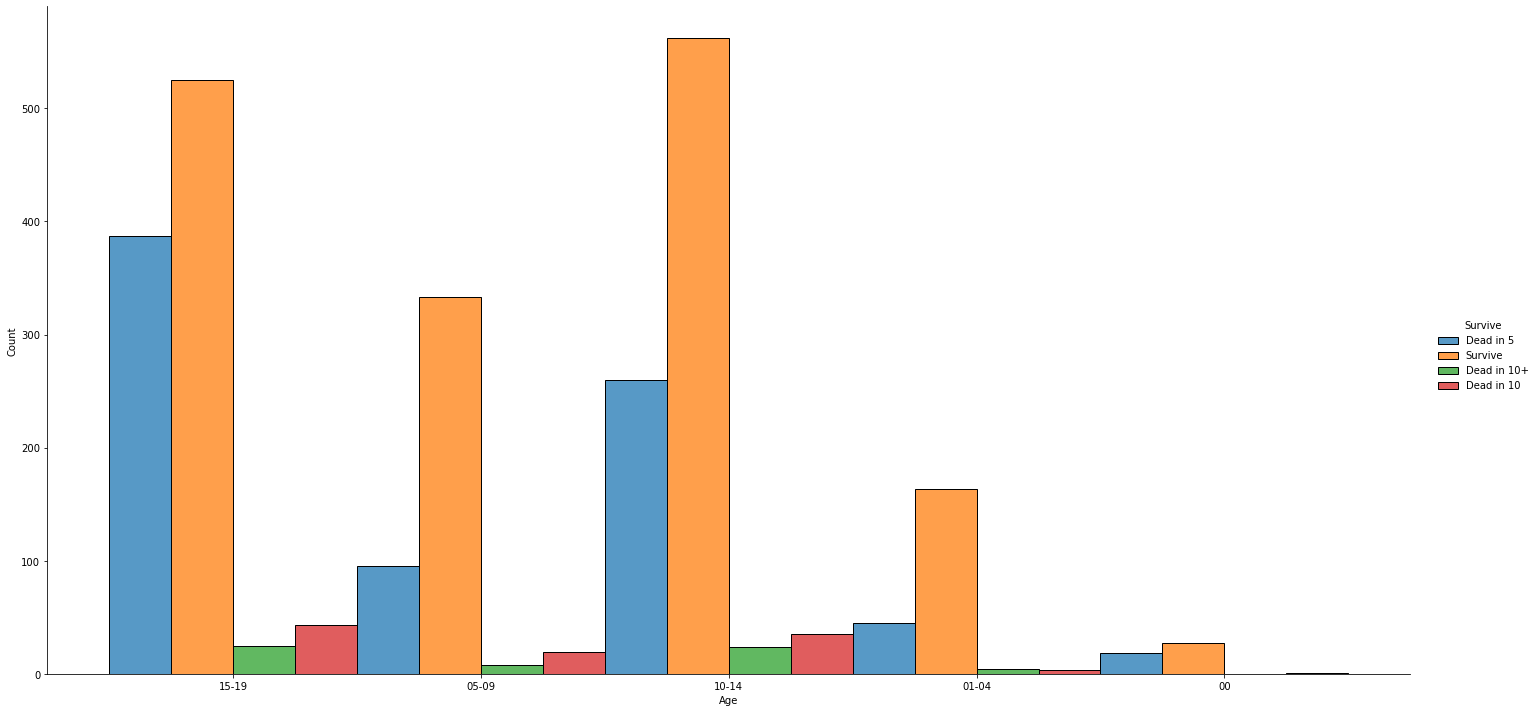

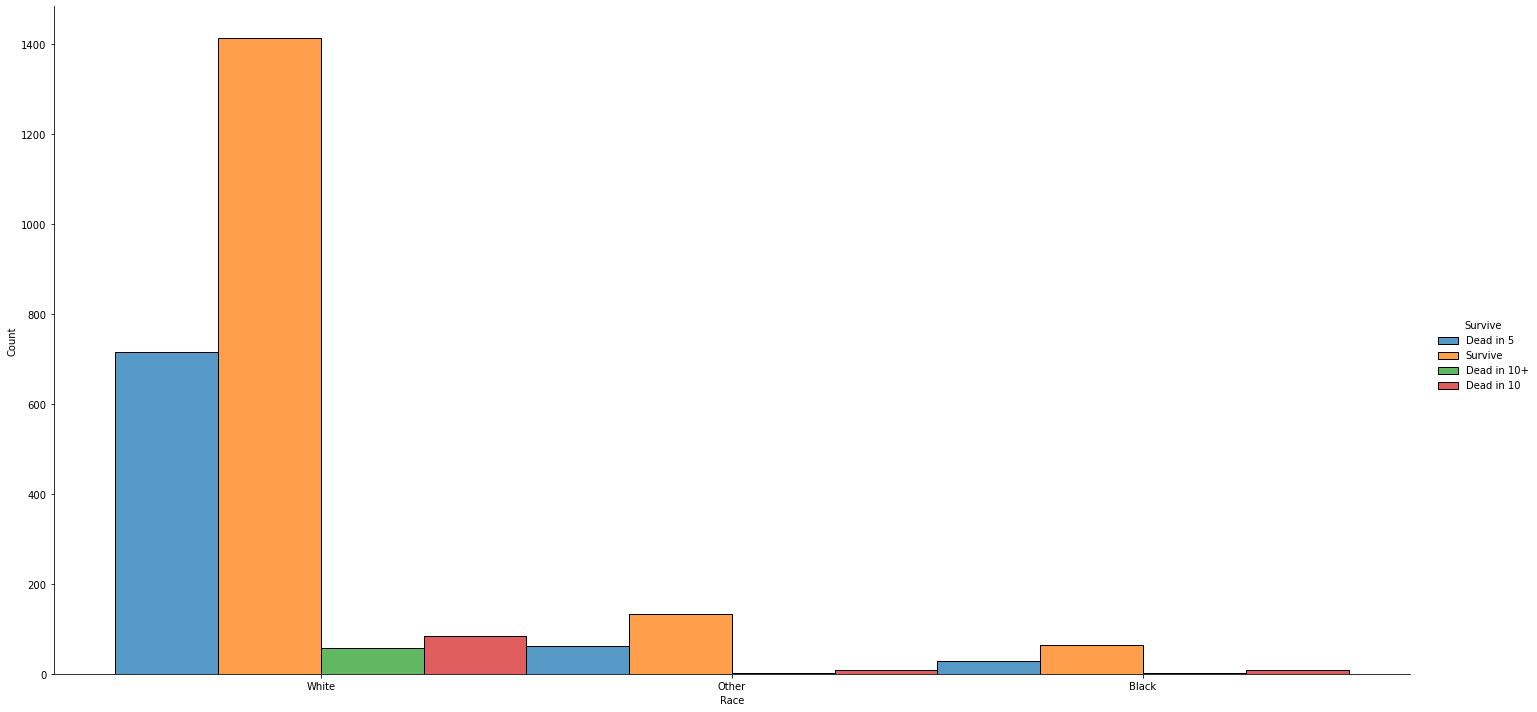

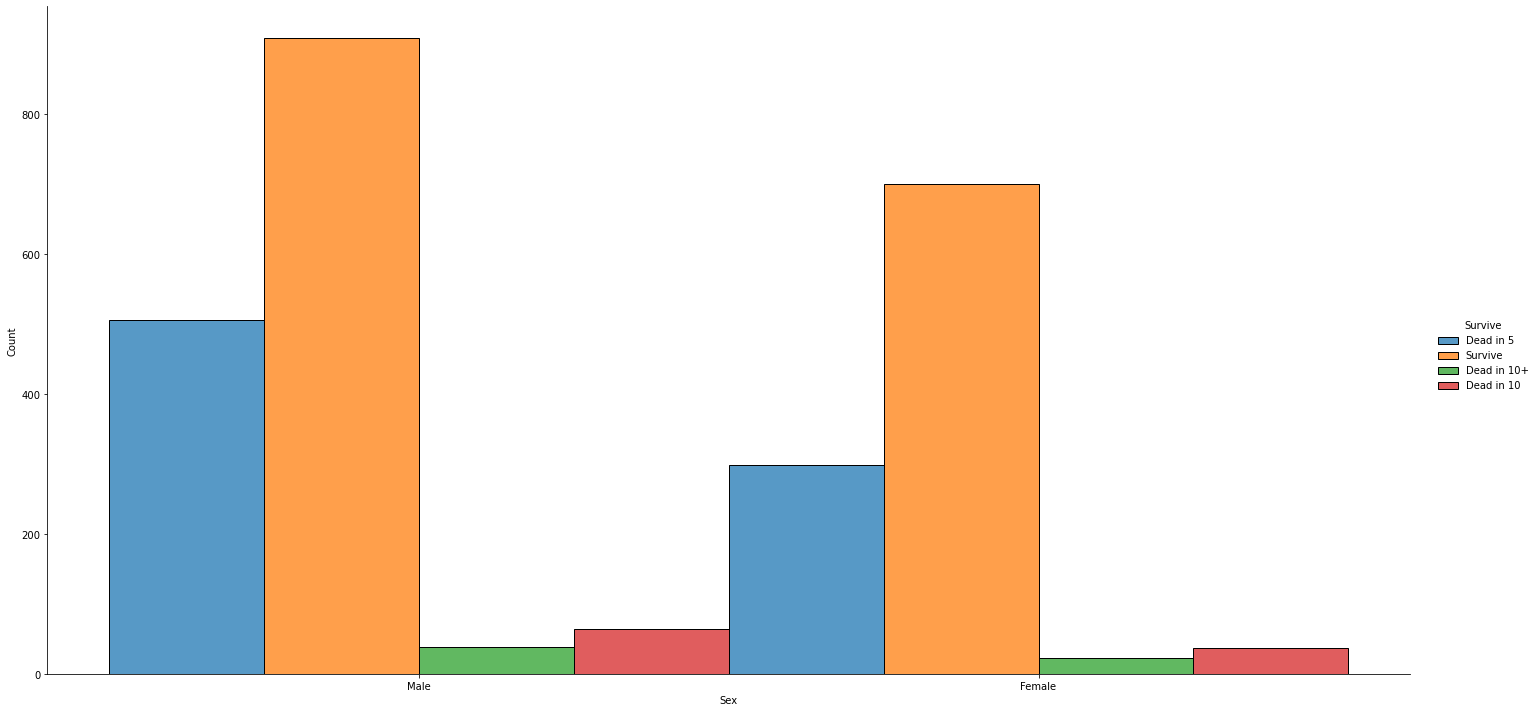

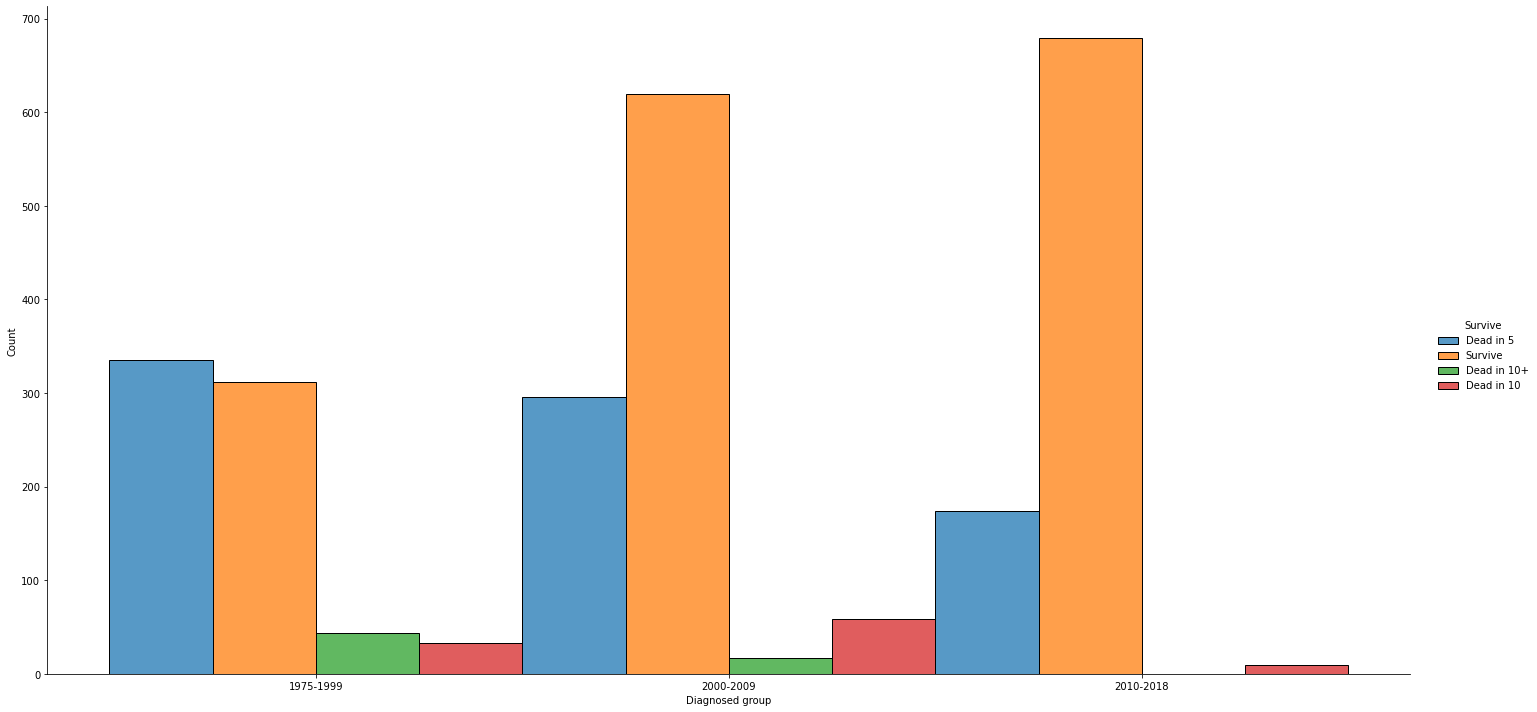

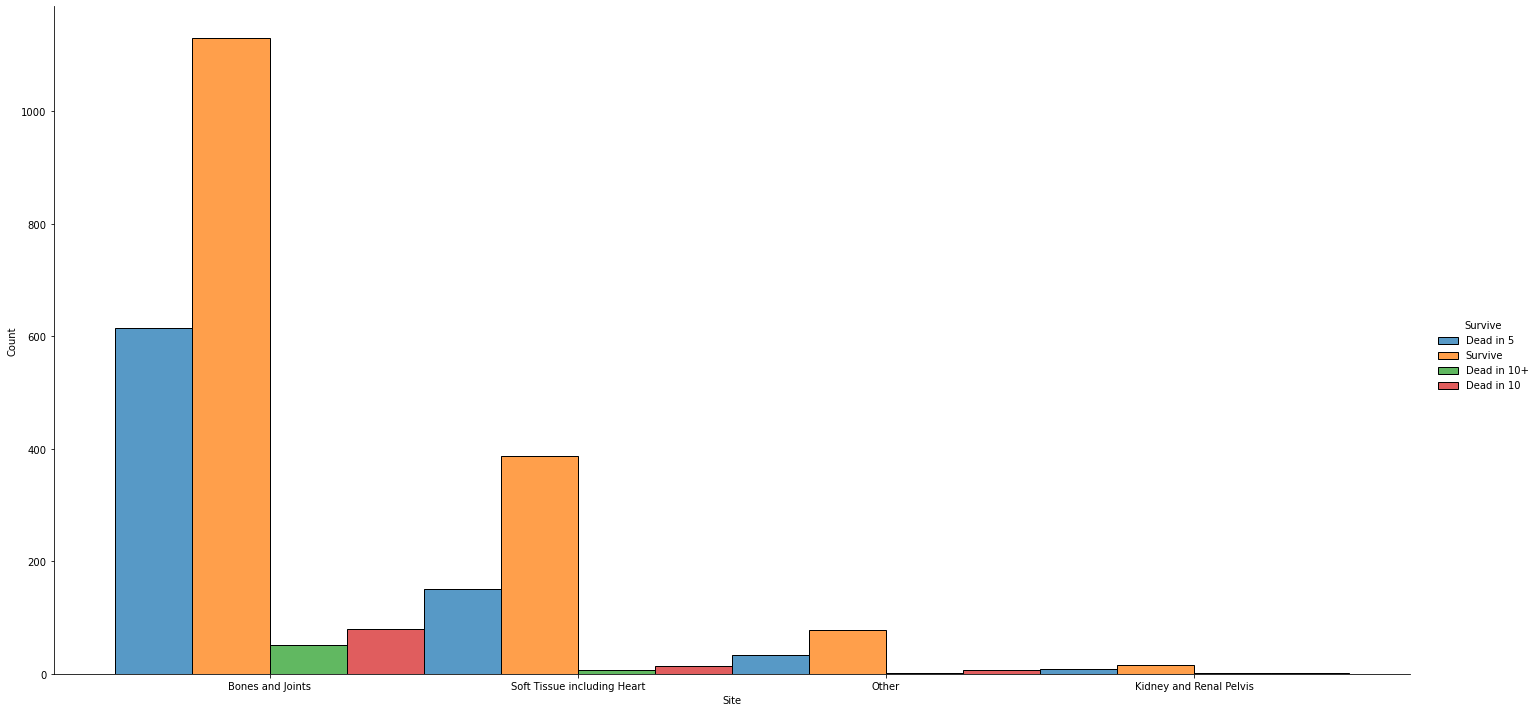

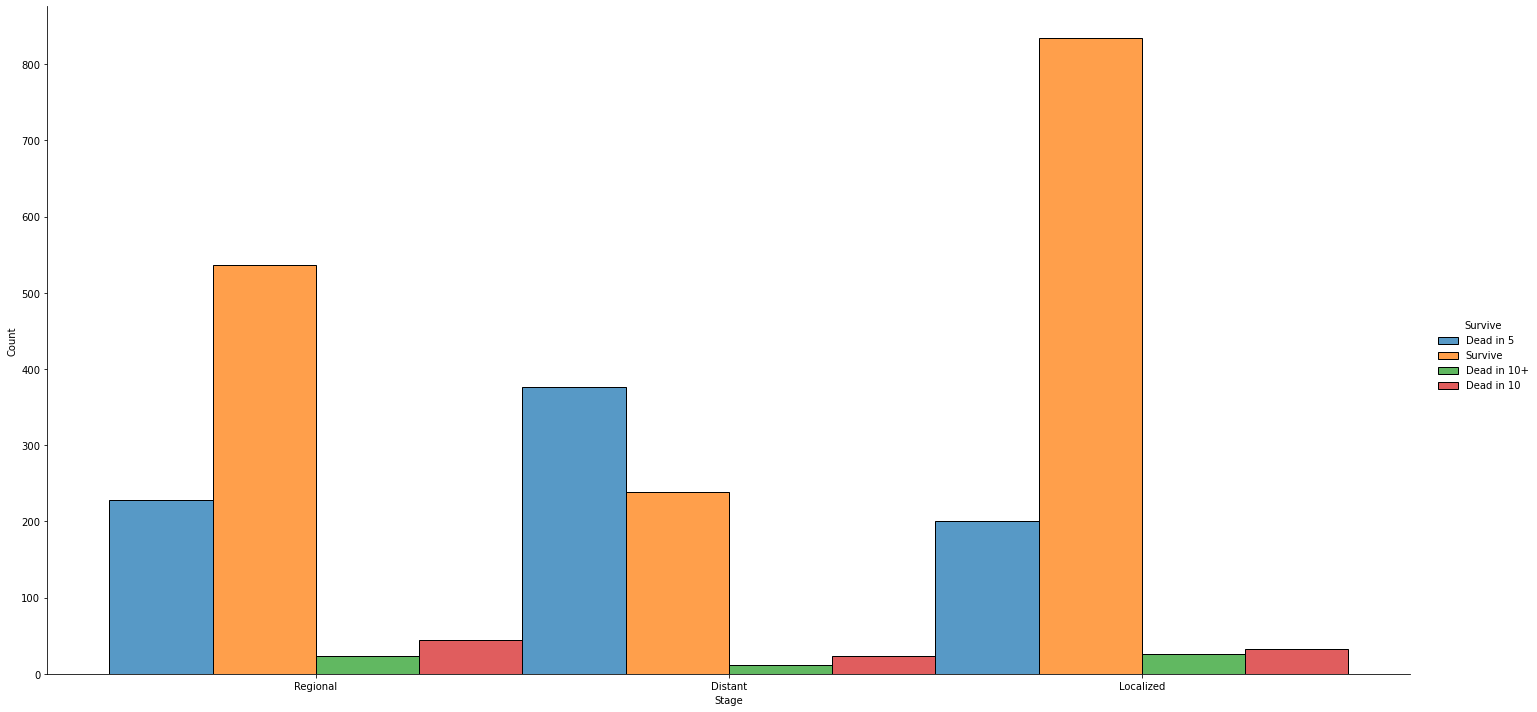

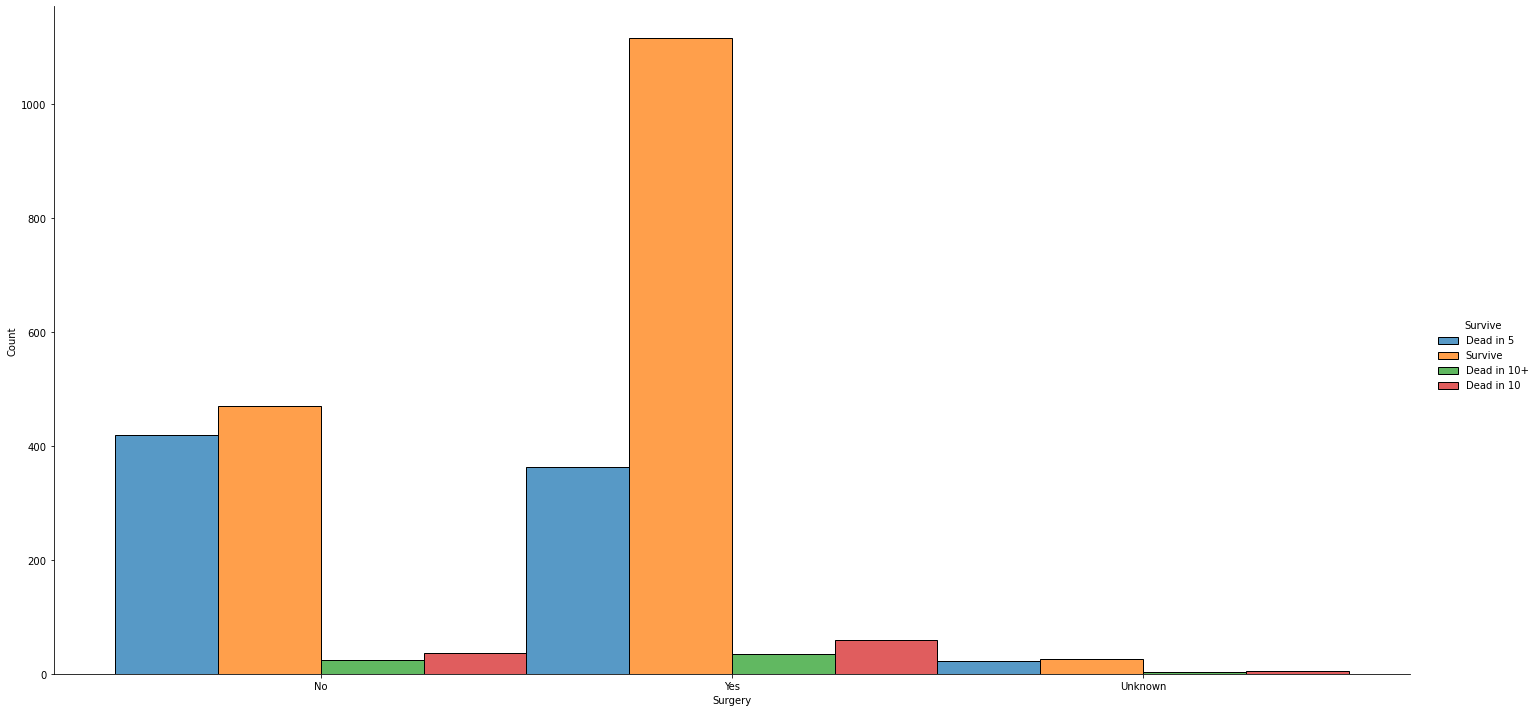

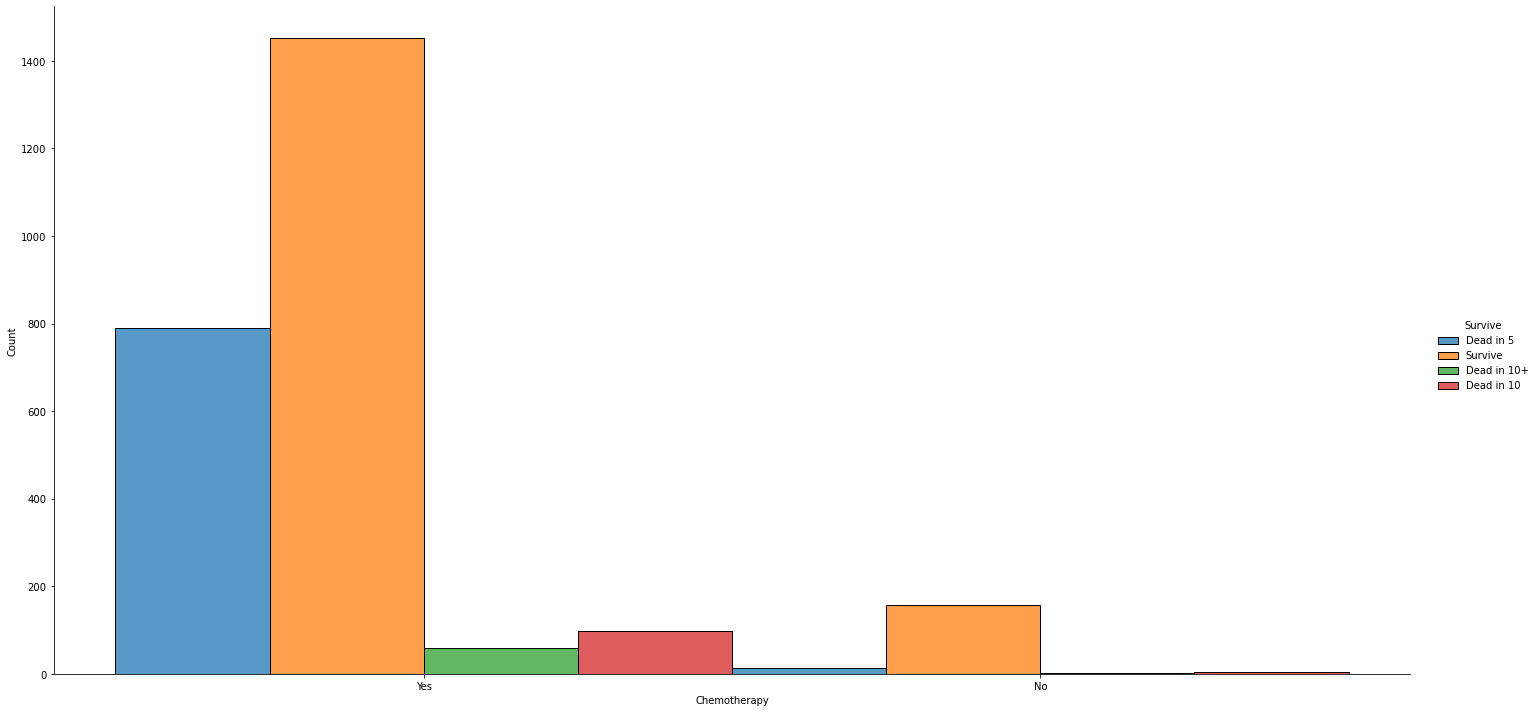

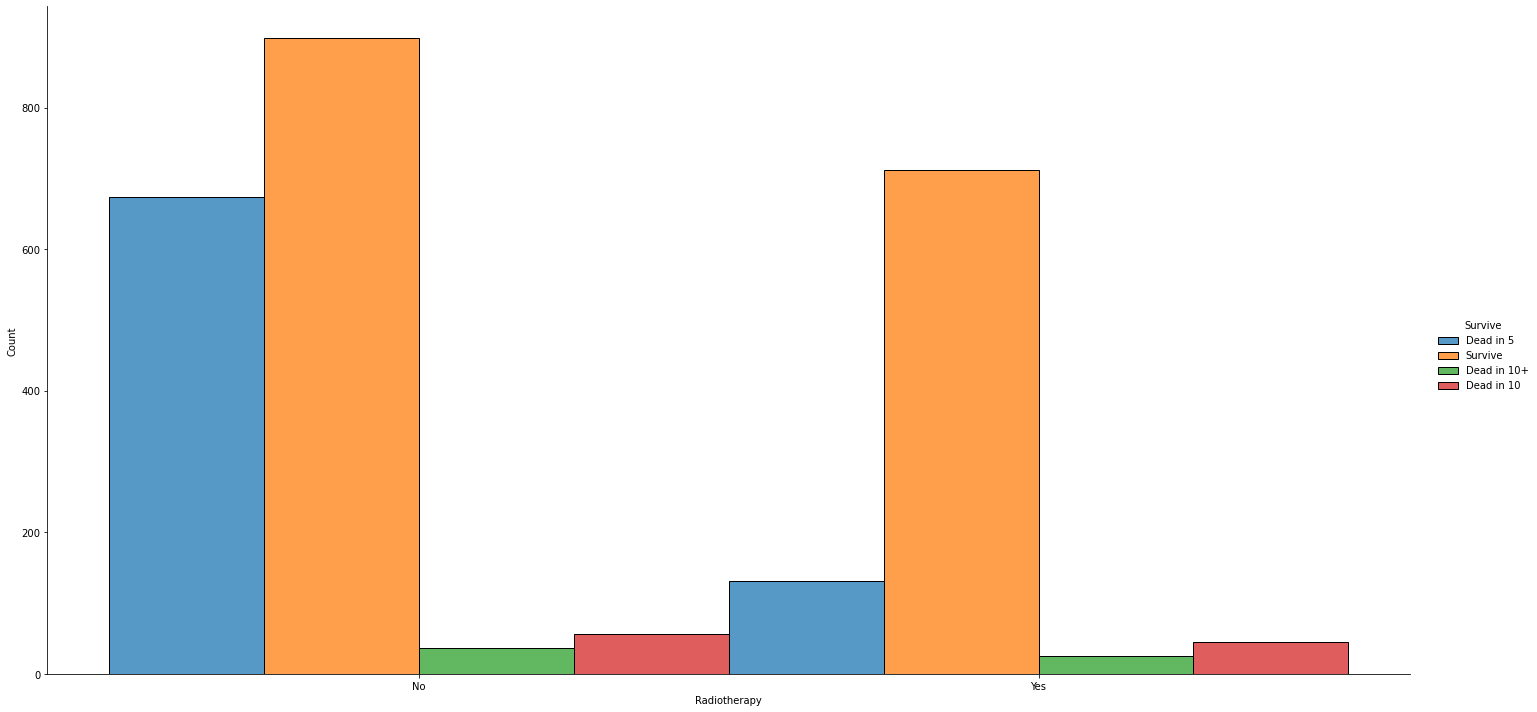

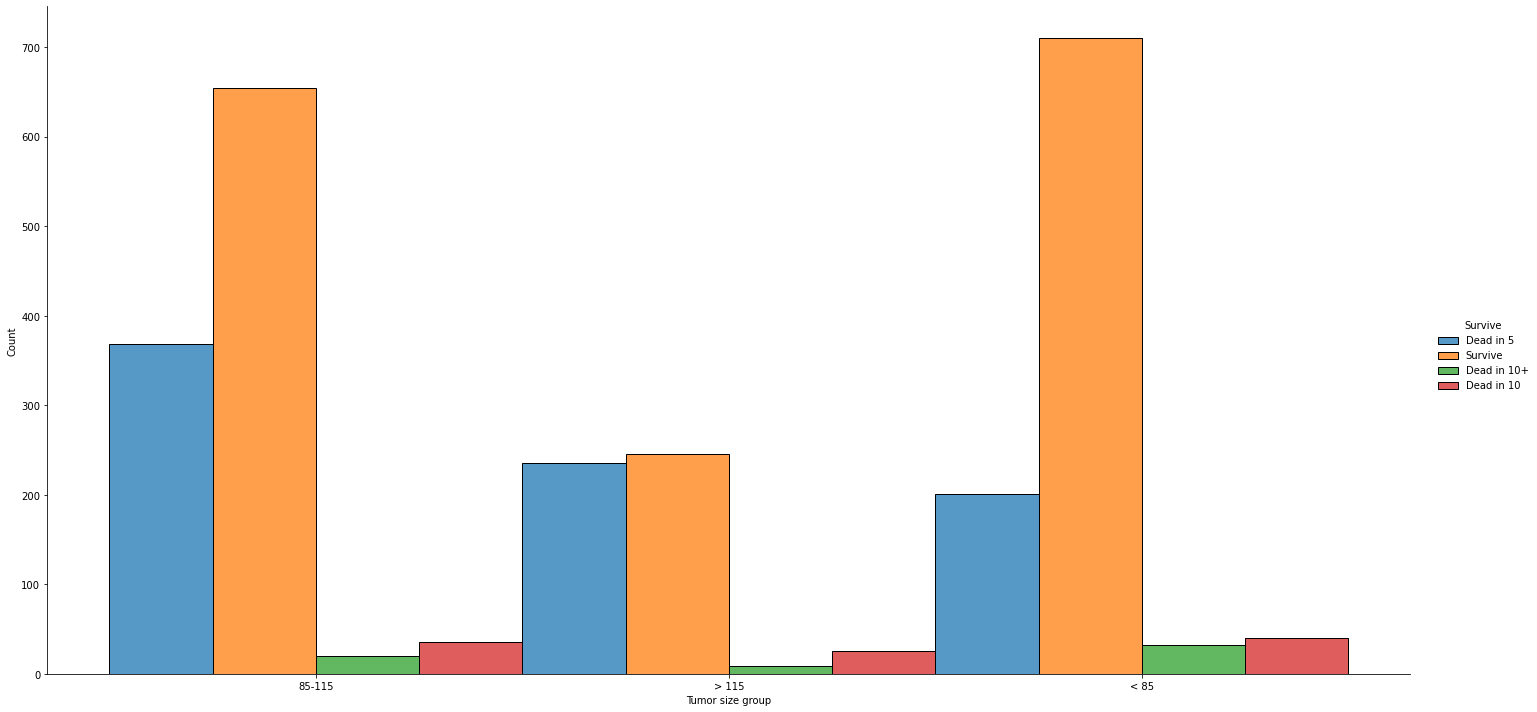

In [115]:
for column in ['Age','Race',
                            'Sex','Diagnosed group',
                            'Site','Stage','Surgery','Chemotherapy','Radiotherapy', 'Tumor size group']:
    sns.displot(df, x=column, hue="Survive", height=10, aspect=2, multiple="dodge")

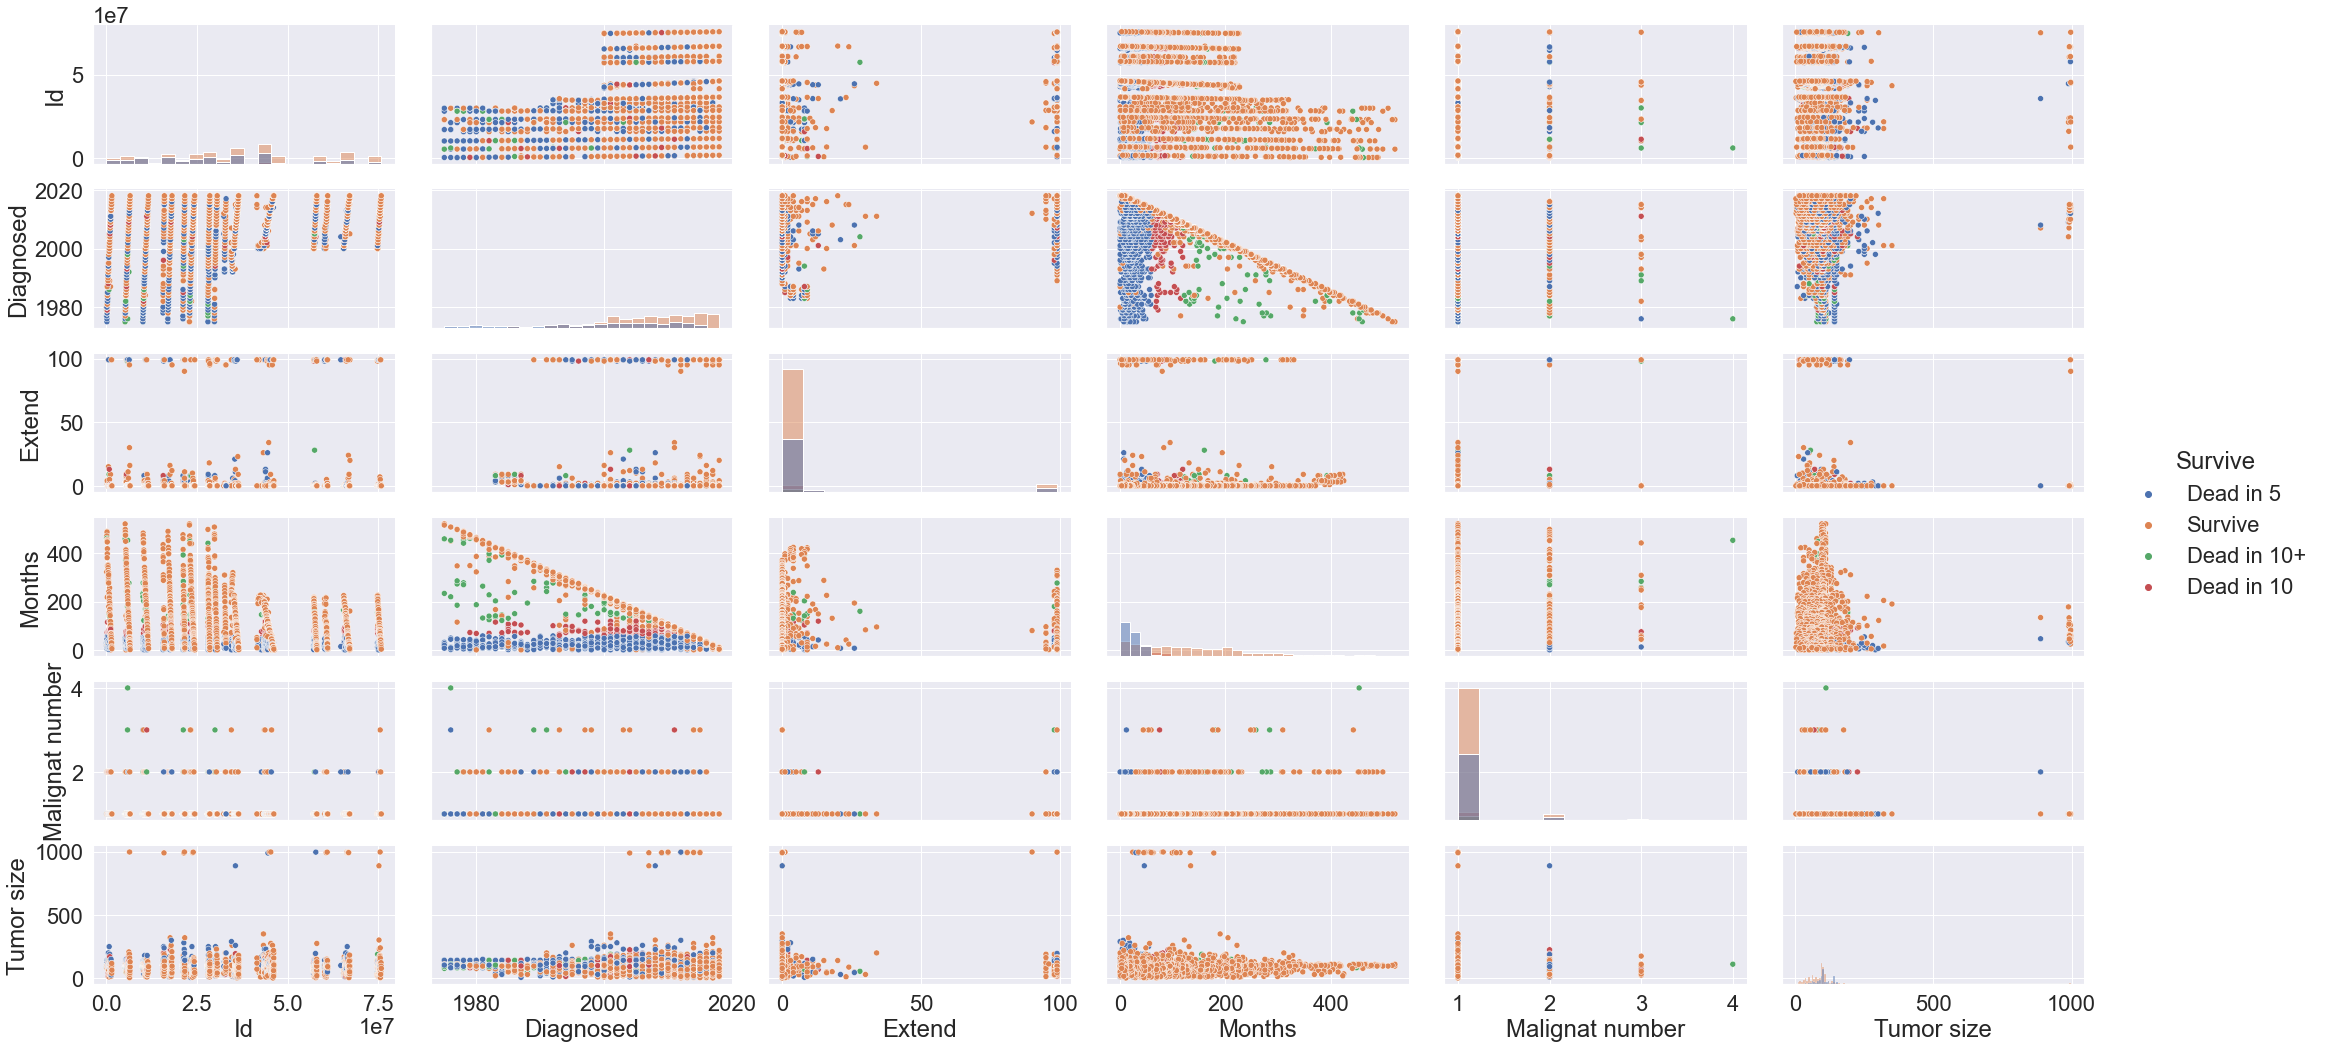

In [116]:
sns.set(font_scale=2)
sns.pairplot(df,hue="Survive", diag_kind="hist", aspect=2)

## Compare two atributes

In [128]:
pd.crosstab(df['Stage'], df['Survive'], normalize='index')

Survive,Dead in 10,Dead in 10+,Dead in 5,Survive
Stage,,,,
Distant,0.036923,0.016923,0.578462,0.367692
Localized,0.029277,0.023788,0.183898,0.763038
Regional,0.053957,0.028777,0.273381,0.643885


In [129]:
pd.crosstab(df['Age'], df['Survive'], normalize='index')

Survive,Dead in 10,Dead in 10+,Dead in 5,Survive
Age,,,,
00,0.021739,0.000000,0.391304,0.586957
01-04,0.013953,0.018605,0.209302,0.758140
05-09,0.041758,0.017582,0.208791,0.731868
10-14,0.039728,0.027242,0.295119,0.637911
15-19,0.043878,0.025510,0.394898,0.535714


In [171]:
pd.crosstab(df['Surgery'], df['Survive'], normalize='index')

Survive,Dead in 10,Dead in 10+,Dead in 5,Survive
Surgery,,,,
No,0.038988,0.025290,0.441517,0.494204
Unknown,0.087719,0.052632,0.403509,0.456140
Yes,0.037556,0.021642,0.231063,0.709739


In [204]:
pd.crosstab(df['Chemotherapy'], df['Survive'], normalize='index')

Survive,Dead in 10,Dead in 10+,Dead in 5,Survive
Chemotherapy,,,,
No,0.014760,0.007380,0.394834,0.583026
Yes,0.042064,0.025585,0.302689,0.629662


In [205]:
pd.crosstab(df['Radiotherapy'], df['Survive'], normalize='index')

Survive,Dead in 10,Dead in 10+,Dead in 5,Survive
Radiotherapy,,,,
No,0.033654,0.021635,0.405048,0.539663
Yes,0.049288,0.027382,0.143483,0.779847


In [206]:
pd.crosstab(df['Tumor size group'], df['Survive'], normalize='index')

Survive,Dead in 10,Dead in 10+,Dead in 5,Survive
Tumor size group,,,,
85-115,0.032498,0.018570,0.341690,0.607242
< 85,0.040692,0.032553,0.204476,0.722279
> 115,0.050290,0.017408,0.456480,0.475822


In [249]:
pd.crosstab(df['Property'], df['Survive'], normalize='index')

Survive,Dead in 10,Dead in 10+,Dead in 5,Survive
Property,,,,
"$60,000 - $74,999",0.038136,0.012712,0.295551,0.653602
"$75,000+",0.044017,0.017882,0.276479,0.661623
"< $60,999",0.033275,0.007005,0.259194,0.700525


In [262]:
pd.crosstab(df['COD'], df['Survive'], normalize='index')

Survive,Dead in 10,Dead in 10+,Dead in 5,Survive
COD,,,,
Alive,0.000000,0.000000,0.000000,1.0
Bones and Joints,0.106294,0.023776,0.869930,0.0
Brain and Other Nervous System,0.227273,0.000000,0.772727,0.0
Dead Other Site,0.093264,0.196891,0.709845,0.0
Other Cause of Death,0.000000,0.000000,0.000000,1.0
Soft Tissue including Heart,0.054054,0.162162,0.783784,0.0


## Detekcija autlajera

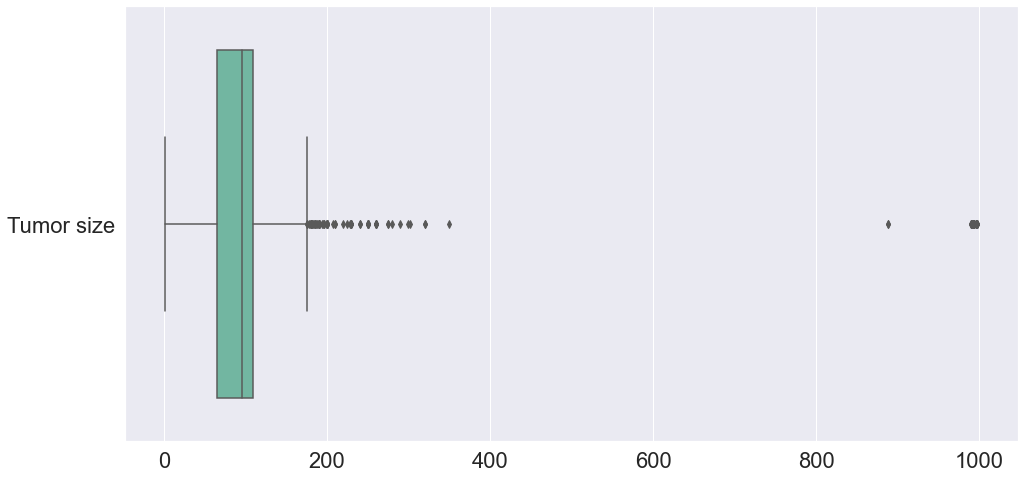

In [216]:
fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(data=df.drop(['Id','Malignat number', 'Diagnosed','Extend','Months'],axis=1), orient="h", palette="Set2")

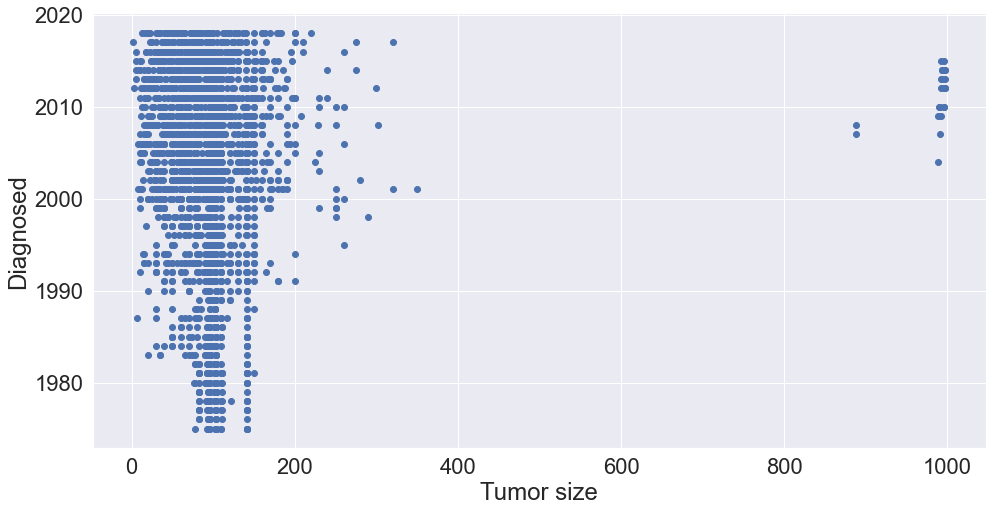

In [223]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Tumor size'], df['Diagnosed'])
ax.set_xlabel('Tumor size')
ax.set_ylabel('Diagnosed')
plt.show()

In [218]:
df.loc[df['Tumor size']>800]

,Id,Age,Race,Sex,Diagnosed,Site,Stage,Surgery,Extend,Months,...,Sequence number,Malignat number,Report,Property,Tumor size,Chemotherapy,Radiotherapy,Diagnosed group,Survive,Tumor size group
1138,21398765,10-14,White,Female,2004,Bones and Joints,Distant,No,0.0,178.0,...,One primary only,1,Hospital inpatient/outpatient or clinic,"$45,000 - $49,999",989.0,Yes,No,2000-2009,Survive,> 115
1419,75227020,10-14,White,Female,2007,Soft Tissue including Heart,Regional,Yes,0.0,134.0,...,One primary only,1,Hospital inpatient/outpatient or clinic,"$70,000 - $74,999",888.0,Yes,No,2000-2009,Survive,> 115
1437,23832757,01-04,White,Male,2007,Soft Tissue including Heart,Localized,Yes,0.0,133.0,...,One primary only,1,Hospital inpatient/outpatient or clinic,"$65,000 - $69,999",991.0,Yes,No,2000-2009,Survive,> 115
1526,35614589,10-14,White,Male,2008,Bones and Joints,Localized,Yes,0.0,46.0,...,2nd of 2 or more primaries,2,Hospital inpatient/outpatient or clinic,"$65,000 - $69,999",888.0,Yes,No,2000-2009,Dead in 5,> 115
1621,44596063,15-19,Black,Female,2009,Bones and Joints,Localized,Yes,0.0,34.0,...,One primary only,1,Hospital inpatient/outpatient or clinic,"$55,000 - $59,999",989.0,Yes,No,2000-2009,Dead in 5,> 115
1696,60679965,10-14,White,Female,2009,Soft Tissue including Heart,Localized,Yes,0.0,114.0,...,One primary only,1,Hospital inpatient/outpatient or clinic,"$50,000 - $54,999",992.0,Yes,No,2000-2009,Survive,> 115
1739,15899817,05-09,Other,Female,2010,Bones and Joints,Localized,Yes,0.0,99.0,...,One primary only,1,Hospital inpatient/outpatient or clinic,"$75,000+",990.0,Yes,No,2010-2018,Survive,> 115
1748,23976365,10-14,White,Male,2010,Bones and Joints,Regional,Yes,0.0,103.0,...,One primary only,1,Hospital inpatient/outpatient or clinic,"$60,000 - $64,999",996.0,Yes,Yes,2010-2018,Survive,> 115
1758,66397211,15-19,White,Female,2010,Bones and Joints,Regional,Yes,0.0,107.0,...,One primary only,1,Hospital inpatient/outpatient or clinic,"$75,000+",991.0,Yes,Yes,2010-2018,Survive,> 115
1759,66397240,00,Other,Male,2010,Soft Tissue including Heart,Regional,Yes,1.0,24.0,...,One primary only,1,Hospital inpatient/outpatient or clinic,"$60,000 - $64,999",996.0,Yes,No,2010-2018,Survive,> 115


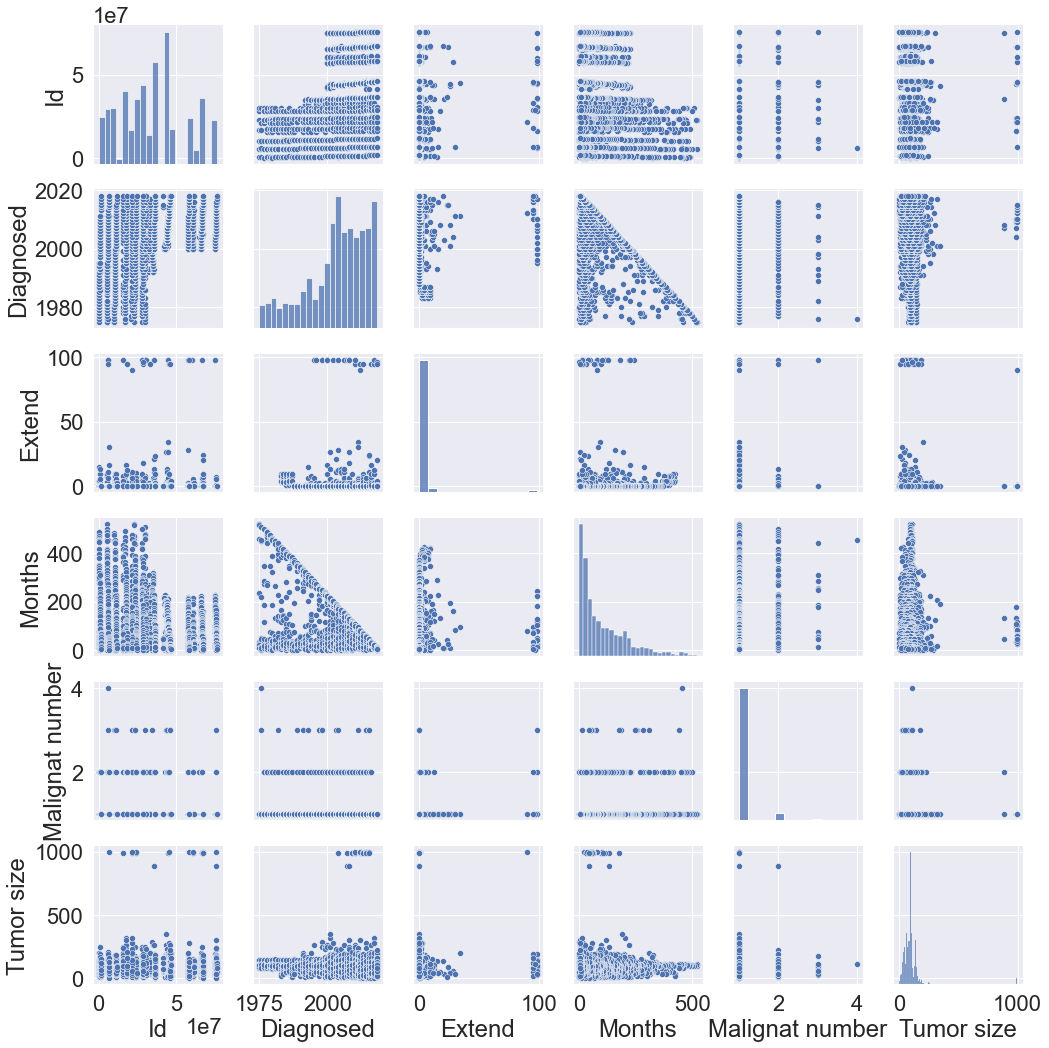

In [220]:
sns.pairplot(df)

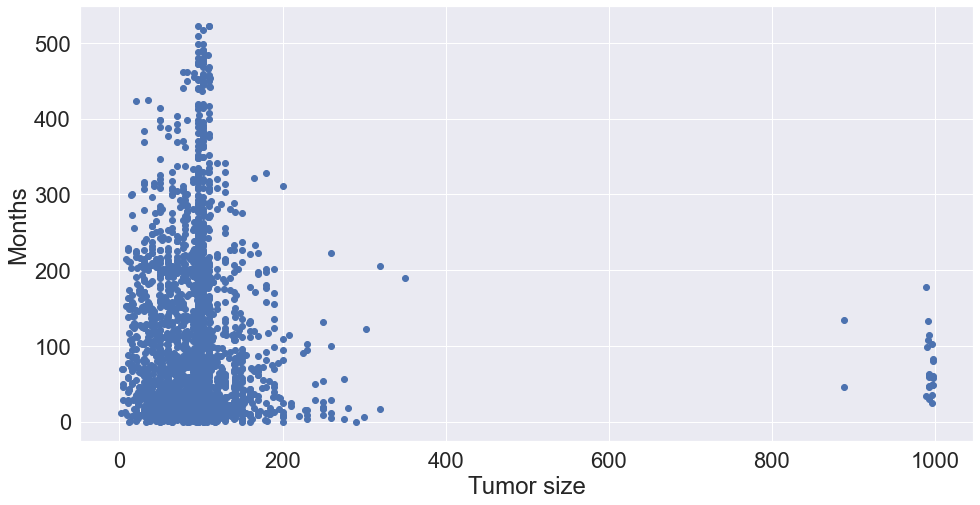

In [221]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['Tumor size'], df['Months'])
ax.set_xlabel('Tumor size')
ax.set_ylabel('Months')
plt.show()

<AxesSubplot:xlabel='Months', ylabel='Tumor size'>

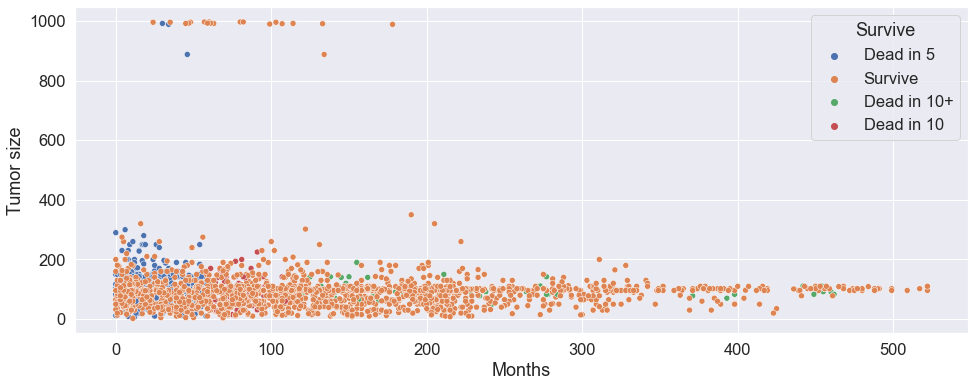

In [269]:
plt.figure(figsize=(16, 6))
sns.set(font_scale=1.5)
sns.scatterplot(data=df,x="Months",y="Tumor size", hue=df["Survive"])

C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 75.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 86.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 51.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


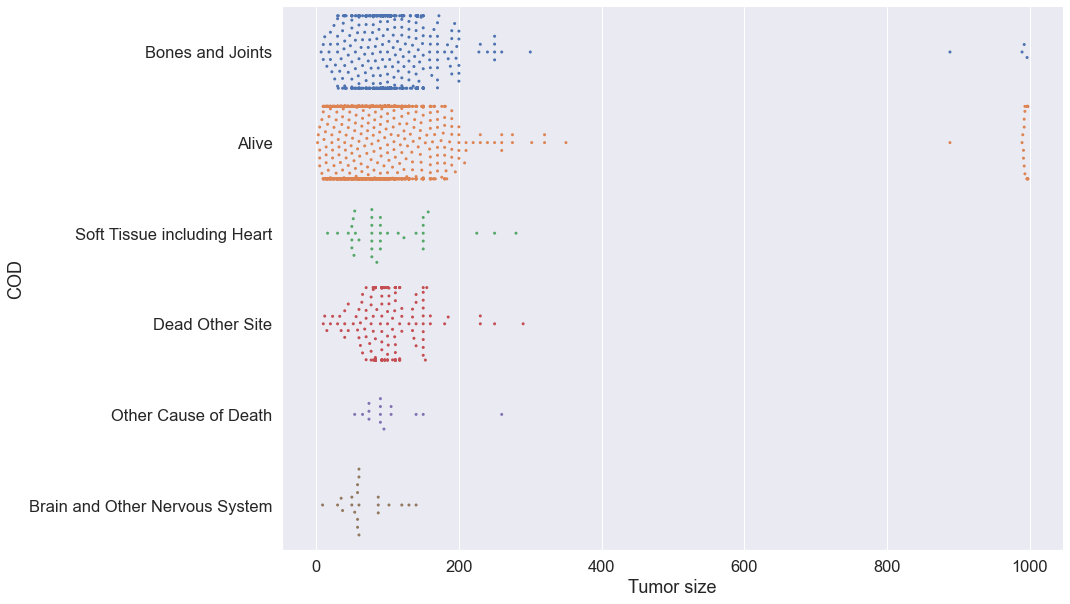

In [272]:
g = sns.swarmplot(x="Tumor size", y="COD", data=df, size = 3)
sns.despine()
g.figure.set_size_inches(14,10)

C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 73.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 57.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


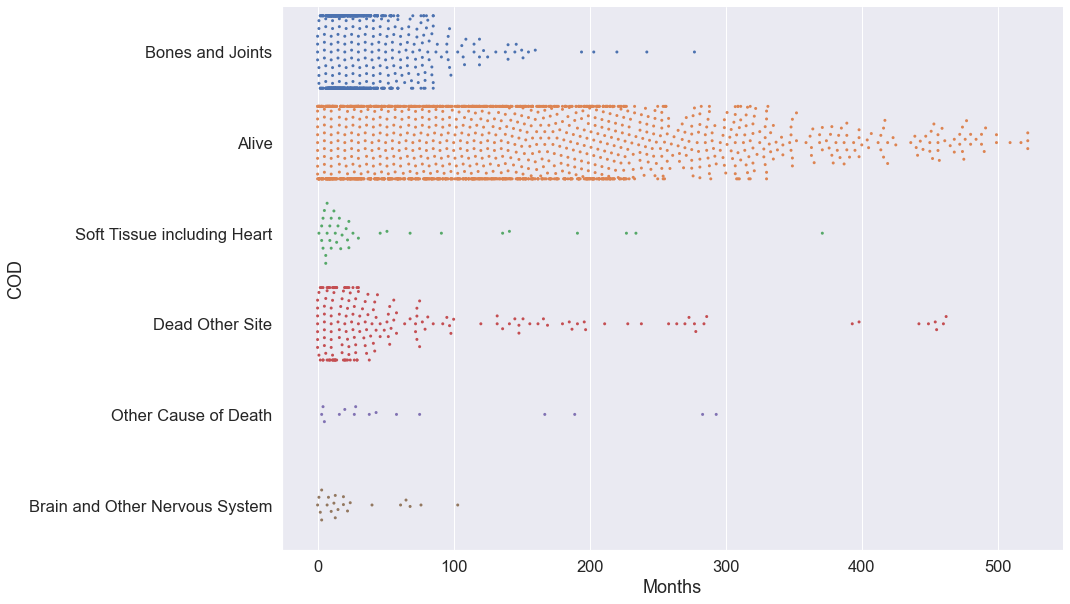

In [273]:
g = sns.swarmplot(x="Months", y="COD", data=df, size = 3)
sns.despine()
g.figure.set_size_inches(14,10)

C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


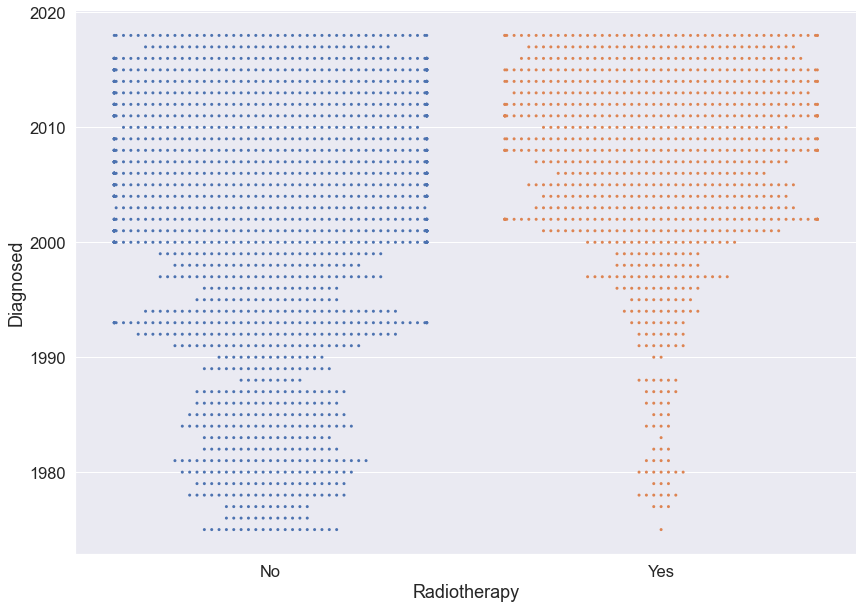

In [282]:
g = sns.swarmplot(x="Radiotherapy", y="Diagnosed", data=df, size = 3)
sns.despine()
g.figure.set_size_inches(14,10)

C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


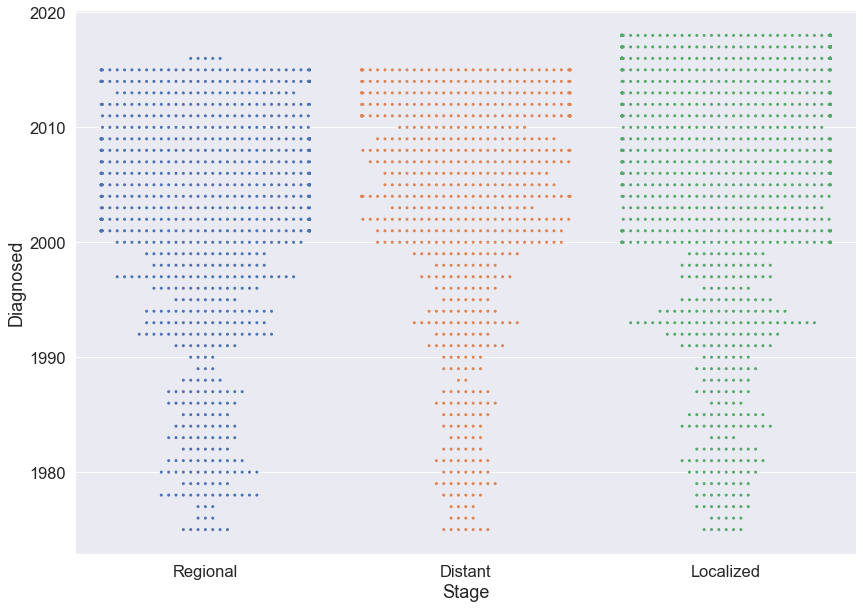

In [284]:
g = sns.swarmplot(x="Stage", y="Diagnosed", data=df, size = 3)
sns.despine()
g.figure.set_size_inches(14,10)

## Delete patient ID, extend, cod2

In [285]:
df.to_csv('fixed2-data.csv', index= False)
df.to_excel ('fix-excel-data.xlsx', index = False, header=True)